# Classification Compendium
### Chistopher Evans 
### October 26, 2019

We are continuing work from the previous notebook titled 'Data Processing and EDA'. We are now going to see the reactions of various machine learning algorithms using scikit. There will be annotations that will add more clarity to the results.

To retain simplicity, the purpose of the models is to see if ASD Traits can be detected through the 10 questions themsleves. Performance will be evaluated and compared.

## Classification Models

In [54]:
from IPython.core.interactiveshell import InteractiveShell
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, model_selection
import warnings
warnings.filterwarnings('ignore')

InteractiveShell.ast_node_interactivity = "all"

# Importing the actual datasets
screening = pd.read_csv("Toddler Autism dataset July 2018.csv")

# Extracting the names of the columns for future use
colnames = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10']
results = ['Class/ASD Traits ']

In [55]:
# This represents all the attributes that will help evaluate the guesses
screening_extracted = screening[colnames]
screening_extracted.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10
0,0,0,0,0,0,0,1,1,0,1
1,1,1,0,0,0,1,1,0,0,0
2,1,0,0,0,0,0,1,1,0,1
3,1,1,1,1,1,1,1,1,1,1
4,1,1,0,1,1,1,1,1,1,1


In [56]:
# This will represent the answer key to compare results at the end
# The algorithms uses matrices, so I don't want words as my data
screening_answers = screening[results]
screening_answers.head()

,Class/ASD Traits
0,No
1,Yes
2,Yes
3,Yes
4,Yes


In [57]:
# Simplifying the data into 1s and 0s for easier use
screening_numerical = screening_answers.eq("Yes").mul(1)
screening_numerical.head()

,Class/ASD Traits
0,0
1,1
2,1
3,1
4,1


## Decision Tree Classifier

In [58]:
# Importing all libraries
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, roc_curve


# Setting up my data
X = screening_extracted.as_matrix()
y =screening_numerical.as_matrix()

# Setting up the sets
train_set, test_set = train_test_split(X, test_size=0.2, random_state = 42)
train_set2, test_set2 = train_test_split(y, test_size=0.2, random_state = 42)

# Doing the classificaiton
clf = DecisionTreeClassifier(random_state=0)
clf.fit(train_set,train_set2)

# Gathering the predictions
results = clf.predict(test_set)

# Getting the output "Predicted Answers   Actual Answers" "Data"
for a in range (0, 100):
    print(str(results[a]) + "   " + str(test_set2[a]))
    print(test_set[a])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

1   [1]
[1 1 1 0 0 1 1 0 1 1]
0   [0]
[0 0 0 0 0 0 1 1 0 1]
0   [0]
[0 0 0 0 0 0 1 0 0 1]
1   [1]
[1 0 1 1 1 0 1 0 0 1]
1   [1]
[1 0 0 0 1 0 1 0 1 0]
0   [0]
[1 0 0 0 0 1 0 0 0 0]
1   [1]
[1 0 1 1 1 1 1 1 1 1]
0   [0]
[1 0 0 1 0 0 0 0 0 0]
1   [1]
[1 1 1 1 1 1 0 1 1 1]
0   [0]
[0 0 0 0 0 1 1 0 0 0]
1   [1]
[1 0 1 1 1 1 1 0 1 1]
0   [0]
[0 0 0 0 0 0 0 0 0 0]
0   [0]
[0 0 0 0 0 0 0 0 0 0]
0   [0]
[0 0 0 0 0 0 0 0 0 0]
1   [1]
[1 1 0 1 1 1 1 1 1 0]
1   [1]
[1 1 1 1 1 1 1 1 1 1]
1   [1]
[0 0 1 1 0 0 1 0 1 0]
1   [1]
[1 1 1 0 1 1 1 1 0 0]
1   [1]
[1 0 1 1 1 0 1 1 1 1]
1   [1]
[1 1 1 1 1 1 1 1 0 0]
1   [1]
[1 0 1 1 1 1 1 1 1 1]
0   [0]
[0 0 0 0 0 0 0 0 0 1]
1   [1]
[1 1 0 0 1 1 0 1 1 1]
1   [1]
[1 1 0 1 0 1 1 0 1 1]
0   [0]
[1 0 0 0 1 0 0 0 0 1]
1   [1]
[1 1 0 1 1 1 1 1 1 1]
1   [1]
[0 1 1 1 0 1 0 1 0 1]
1   [1]
[1 1 0 1 0 1 1 0 0 1]
1   [1]
[1 0 1 1 1 1 0 1 1 0]
1   [1]
[1 0 1 1 1 1 1 0 0 0]
1   [1]
[0 0 1 1 1 1 1 1 1 1]
0   [0]
[1 0 0 0 0 0 0 0 0 1]
1   [1]
[1 1 0 1 1 1 1 1 1 1]
1   [1]
[1

Confustion Matrix:
[ 67   2   5 137]
Precision:
0.9856115107913669
Recall:
0.9647887323943662
F1 Score:
0.9750889679715302
Area Under the ROC:
0.9679016125739947


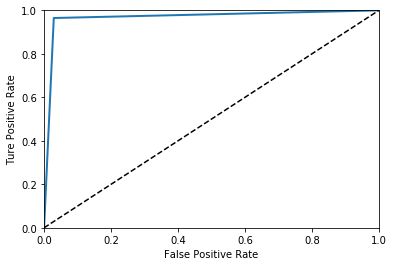

In [59]:
# Getting the confusion matrix
returned = confusion_matrix(test_set2, results, labels = [0,1]).ravel()

if len(returned) == 4:
    tn, fp, fn, tp = returned
precision = (tp/(tp + fp))
recall = (tp/(tp + fn))
    
print ("Confustion Matrix:")    
print (returned)
print ("Precision:")    
print (precision)
print ("Recall:")    
print (recall)

# Getting the F1 score
print ("F1 Score:")
print (f1_score(test_set2, results))
# Getting the Area Under the ROC
print ("Area Under the ROC:")    
print (roc_auc_score(test_set2, results))

# Getting the ROC Curve
fpr, tpr, thresholds = roc_curve(test_set2, results)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth = 2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('Ture Positive Rate')

# Plotting the curve
plot_roc_curve(fpr, tpr)
plt.show()

## Random Forest Classifier

In [60]:
#  Doing the classification
clf = RandomForestClassifier(max_depth=5, random_state=0)
clf.fit(train_set,train_set2)

# Gathering the predictions
results = clf.predict(test_set)

# Getting the output "Predicted Answers   Actual Answers" "Data"
for a in range (0, 100):
    print(str(results[a]) + "   " + str(test_set2[a]))
    print(test_set[a])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

1   [1]
[1 1 1 0 0 1 1 0 1 1]
0   [0]
[0 0 0 0 0 0 1 1 0 1]
0   [0]
[0 0 0 0 0 0 1 0 0 1]
1   [1]
[1 0 1 1 1 0 1 0 0 1]
1   [1]
[1 0 0 0 1 0 1 0 1 0]
0   [0]
[1 0 0 0 0 1 0 0 0 0]
1   [1]
[1 0 1 1 1 1 1 1 1 1]
0   [0]
[1 0 0 1 0 0 0 0 0 0]
1   [1]
[1 1 1 1 1 1 0 1 1 1]
0   [0]
[0 0 0 0 0 1 1 0 0 0]
1   [1]
[1 0 1 1 1 1 1 0 1 1]
0   [0]
[0 0 0 0 0 0 0 0 0 0]
0   [0]
[0 0 0 0 0 0 0 0 0 0]
0   [0]
[0 0 0 0 0 0 0 0 0 0]
1   [1]
[1 1 0 1 1 1 1 1 1 0]
1   [1]
[1 1 1 1 1 1 1 1 1 1]
1   [1]
[0 0 1 1 0 0 1 0 1 0]
1   [1]
[1 1 1 0 1 1 1 1 0 0]
1   [1]
[1 0 1 1 1 0 1 1 1 1]
1   [1]
[1 1 1 1 1 1 1 1 0 0]
1   [1]
[1 0 1 1 1 1 1 1 1 1]
0   [0]
[0 0 0 0 0 0 0 0 0 1]
1   [1]
[1 1 0 0 1 1 0 1 1 1]
1   [1]
[1 1 0 1 0 1 1 0 1 1]
0   [0]
[1 0 0 0 1 0 0 0 0 1]
1   [1]
[1 1 0 1 1 1 1 1 1 1]
1   [1]
[0 1 1 1 0 1 0 1 0 1]
1   [1]
[1 1 0 1 0 1 1 0 0 1]
1   [1]
[1 0 1 1 1 1 0 1 1 0]
1   [1]
[1 0 1 1 1 1 1 0 0 0]
1   [1]
[0 0 1 1 1 1 1 1 1 1]
0   [0]
[1 0 0 0 0 0 0 0 0 1]
1   [1]
[1 1 0 1 1 1 1 1 1 1]
1   [1]
[1

Confustion Matrix:
[ 67   2   4 138]
Precision:
0.9857142857142858
Recall:
0.971830985915493
F1 Score:
0.9787234042553192
Area Under the ROC:
0.971422739334558


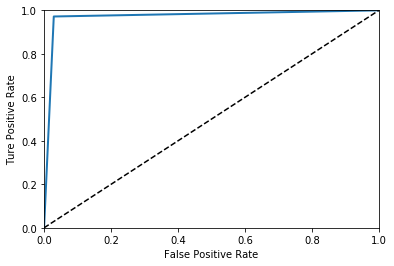

In [61]:
# Getting the confusion matrix
returned = confusion_matrix(test_set2, results, labels = [0,1]).ravel()

if len(returned) == 4:
    tn, fp, fn, tp = returned
precision = (tp/(tp + fp))
recall = (tp/(tp + fn))
    
print ("Confustion Matrix:")    
print (returned)
print ("Precision:")    
print (precision)
print ("Recall:")    
print (recall)

# Getting the F1 score
print ("F1 Score:")
print (f1_score(test_set2, results))
# Getting the Area Under the ROC
print ("Area Under the ROC:")    
print (roc_auc_score(test_set2, results))

# Getting the ROC Curve
fpr, tpr, thresholds = roc_curve(test_set2, results)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth = 2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('Ture Positive Rate')

# Plotting the curve
plot_roc_curve(fpr, tpr)
plt.show()

## Scholastic Gradient Descent

In [62]:
# Importing all libraries
from sklearn.linear_model import Ridge

# Doing the classification
clf = linear_model.SGDClassifier(penalty = "l2")
clf.fit(train_set, train_set2.ravel())

# Gathering the predictions
results = clf.predict(test_set)

# Getting the output "Predicted Answers   Actual Answers" "Data"
for a in range (0, 100):
    print(str(results[a]) + "   " + str(test_set2[a]))
    print(test_set[a])

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

1   [1]
[1 1 1 0 0 1 1 0 1 1]
0   [0]
[0 0 0 0 0 0 1 1 0 1]
0   [0]
[0 0 0 0 0 0 1 0 0 1]
1   [1]
[1 0 1 1 1 0 1 0 0 1]
1   [1]
[1 0 0 0 1 0 1 0 1 0]
0   [0]
[1 0 0 0 0 1 0 0 0 0]
1   [1]
[1 0 1 1 1 1 1 1 1 1]
0   [0]
[1 0 0 1 0 0 0 0 0 0]
1   [1]
[1 1 1 1 1 1 0 1 1 1]
0   [0]
[0 0 0 0 0 1 1 0 0 0]
1   [1]
[1 0 1 1 1 1 1 0 1 1]
0   [0]
[0 0 0 0 0 0 0 0 0 0]
0   [0]
[0 0 0 0 0 0 0 0 0 0]
0   [0]
[0 0 0 0 0 0 0 0 0 0]
1   [1]
[1 1 0 1 1 1 1 1 1 0]
1   [1]
[1 1 1 1 1 1 1 1 1 1]
1   [1]
[0 0 1 1 0 0 1 0 1 0]
1   [1]
[1 1 1 0 1 1 1 1 0 0]
1   [1]
[1 0 1 1 1 0 1 1 1 1]
1   [1]
[1 1 1 1 1 1 1 1 0 0]
1   [1]
[1 0 1 1 1 1 1 1 1 1]
0   [0]
[0 0 0 0 0 0 0 0 0 1]
1   [1]
[1 1 0 0 1 1 0 1 1 1]
1   [1]
[1 1 0 1 0 1 1 0 1 1]
0   [0]
[1 0 0 0 1 0 0 0 0 1]
1   [1]
[1 1 0 1 1 1 1 1 1 1]
1   [1]
[0 1 1 1 0 1 0 1 0 1]
1   [1]
[1 1 0 1 0 1 1 0 0 1]
1   [1]
[1 0 1 1 1 1 0 1 1 0]
1   [1]
[1 0 1 1 1 1 1 0 0 0]
1   [1]
[0 0 1 1 1 1 1 1 1 1]
0   [0]
[1 0 0 0 0 0 0 0 0 1]
1   [1]
[1 1 0 1 1 1 1 1 1 1]
1   [1]
[1

Confustion Matrix:
[ 69   0   0 142]
Precision:
1.0
Recall:
1.0
F1 Score:
1.0
Area Under the ROC:
1.0


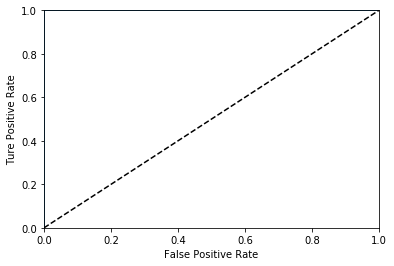

In [63]:
# Getting the confusion matrix
returned = confusion_matrix(test_set2, results, labels = [0,1]).ravel()

if len(returned) == 4:
    tn, fp, fn, tp = returned
precision = (tp/(tp + fp))
recall = (tp/(tp + fn))
    
print ("Confustion Matrix:")    
print (returned)
print ("Precision:")    
print (precision)
print ("Recall:")    
print (recall)

# Getting the F1 score
print ("F1 Score:")
print (f1_score(test_set2, results))
# Getting the Area Under the ROC
print ("Area Under the ROC:")    
print (roc_auc_score(test_set2, results))

# Getting the ROC Curve
fpr, tpr, thresholds = roc_curve(test_set2, results)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth = 2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('Ture Positive Rate')

# Plotting the curve
plot_roc_curve(fpr, tpr)
plt.show()

## Regularization

In [64]:
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(train_set, train_set2.ravel())
results = clf.predict(test_set)

# Getting the output "Predicted Answers   Actual Answers" "Data"
for a in range (0, 100):
    print(str(results[a]) + "   " + str(test_set2[a]))
    print(test_set[a])

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=42, solver='cholesky', tol=0.001)

1   [1]
[1 1 1 0 0 1 1 0 1 1]
0   [0]
[0 0 0 0 0 0 1 1 0 1]
0   [0]
[0 0 0 0 0 0 1 0 0 1]
1   [1]
[1 0 1 1 1 0 1 0 0 1]
1   [1]
[1 0 0 0 1 0 1 0 1 0]
0   [0]
[1 0 0 0 0 1 0 0 0 0]
1   [1]
[1 0 1 1 1 1 1 1 1 1]
0   [0]
[1 0 0 1 0 0 0 0 0 0]
1   [1]
[1 1 1 1 1 1 0 1 1 1]
0   [0]
[0 0 0 0 0 1 1 0 0 0]
1   [1]
[1 0 1 1 1 1 1 0 1 1]
0   [0]
[0 0 0 0 0 0 0 0 0 0]
0   [0]
[0 0 0 0 0 0 0 0 0 0]
0   [0]
[0 0 0 0 0 0 0 0 0 0]
1   [1]
[1 1 0 1 1 1 1 1 1 0]
1   [1]
[1 1 1 1 1 1 1 1 1 1]
1   [1]
[0 0 1 1 0 0 1 0 1 0]
1   [1]
[1 1 1 0 1 1 1 1 0 0]
1   [1]
[1 0 1 1 1 0 1 1 1 1]
1   [1]
[1 1 1 1 1 1 1 1 0 0]
1   [1]
[1 0 1 1 1 1 1 1 1 1]
0   [0]
[0 0 0 0 0 0 0 0 0 1]
1   [1]
[1 1 0 0 1 1 0 1 1 1]
1   [1]
[1 1 0 1 0 1 1 0 1 1]
0   [0]
[1 0 0 0 1 0 0 0 0 1]
1   [1]
[1 1 0 1 1 1 1 1 1 1]
1   [1]
[0 1 1 1 0 1 0 1 0 1]
1   [1]
[1 1 0 1 0 1 1 0 0 1]
1   [1]
[1 0 1 1 1 1 0 1 1 0]
1   [1]
[1 0 1 1 1 1 1 0 0 0]
1   [1]
[0 0 1 1 1 1 1 1 1 1]
0   [0]
[1 0 0 0 0 0 0 0 0 1]
1   [1]
[1 1 0 1 1 1 1 1 1 1]
1   [1]
[1

Confustion Matrix:
[ 69   0   0 142]
Precision:
1.0
Recall:
1.0
F1 Score:
1.0
Area Under the ROC:
1.0


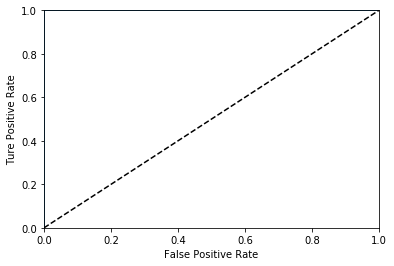

In [65]:
# Getting the confusion matrix
returned = confusion_matrix(test_set2, results, labels = [0,1]).ravel()

if len(returned) == 4:
    tn, fp, fn, tp = returned
precision = (tp/(tp + fp))
recall = (tp/(tp + fn))
    
print ("Confustion Matrix:")    
print (returned)
print ("Precision:")    
print (precision)
print ("Recall:")    
print (recall)

# Getting the F1 score
print ("F1 Score:")
print (f1_score(test_set2, results))
# Getting the Area Under the ROC
print ("Area Under the ROC:")    
print (roc_auc_score(test_set2, results))

# Getting the ROC Curve
fpr, tpr, thresholds = roc_curve(test_set2, results)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth = 2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('Ture Positive Rate')

# Plotting the curve
plot_roc_curve(fpr, tpr)
plt.show()

## Final Thoughts

All of the classifiers did well. The kind of dataset that was used is the exception. Datasets in real life are larger and messier. Don't expect perfection on the first try, you may have to preprocess your data and change machine learning algorithms in the long run.